## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()
#另一寫法(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    # train:(50000, 32, 32, 3)/test:(10000, 32, 32, 3)
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [7]:
model.summary()
#optimizer = keras.optimizers.Adam(lr=0.001)
opt = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 52us/step - loss: 2.1267 - accuracy: 0.2363 - val_loss: 1.9726 - val_accuracy: 0.2963
Epoch 2/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.9045 - accuracy: 0.3227 - val_loss: 1.8506 - val_accuracy: 0.3442
Epoch 3/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.8244 - accuracy: 0.3535 - val_loss: 1.7951 - val_accuracy: 0.3595
Epoch 4/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.7701 - accuracy: 0.3742 - val_loss: 1.7380 - val_accuracy: 0.3855
Epoch 5/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.7320 - accuracy: 0.3870 - val_loss: 1.7161 - val_accuracy: 0.3911
Epoch 6/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6983 - accuracy: 0.3992 - val_loss: 1.6701 - val_accuracy: 0.4142
Epoch 7/500
50000/50000 [==============================] - 2s 

Epoch 56/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0586 - accuracy: 0.6252 - val_loss: 1.3619 - val_accuracy: 0.5262
Epoch 57/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0470 - accuracy: 0.6262 - val_loss: 1.3478 - val_accuracy: 0.5321
Epoch 58/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0207 - accuracy: 0.6380 - val_loss: 1.3636 - val_accuracy: 0.5285
Epoch 59/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0242 - accuracy: 0.6365 - val_loss: 1.4078 - val_accuracy: 0.5183
Epoch 60/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0318 - accuracy: 0.6318 - val_loss: 1.3471 - val_accuracy: 0.5364
Epoch 61/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0115 - accuracy: 0.6420 - val_loss: 1.3554 - val_accuracy: 0.5319
Epoch 62/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0099 - accuracy: 0.6402

Epoch 111/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.6168 - accuracy: 0.7825 - val_loss: 1.6437 - val_accuracy: 0.5164
Epoch 112/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.5961 - accuracy: 0.7905 - val_loss: 1.6338 - val_accuracy: 0.5261
Epoch 113/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.5991 - accuracy: 0.7880 - val_loss: 1.6642 - val_accuracy: 0.5256
Epoch 114/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.5761 - accuracy: 0.7937 - val_loss: 1.6658 - val_accuracy: 0.5231
Epoch 115/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.5628 - accuracy: 0.8016 - val_loss: 1.7416 - val_accuracy: 0.5085
Epoch 116/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.5742 - accuracy: 0.7987 - val_loss: 1.7028 - val_accuracy: 0.5207
Epoch 117/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.5603 - accuracy:

50000/50000 [==============================] - 2s 37us/step - loss: 0.2528 - accuracy: 0.9171 - val_loss: 2.3013 - val_accuracy: 0.5171
Epoch 166/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.2533 - accuracy: 0.9163 - val_loss: 2.3336 - val_accuracy: 0.5149
Epoch 167/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.2669 - accuracy: 0.9093 - val_loss: 2.4533 - val_accuracy: 0.5052
Epoch 168/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.2813 - accuracy: 0.9020 - val_loss: 2.3222 - val_accuracy: 0.5206
Epoch 169/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.2597 - accuracy: 0.9126 - val_loss: 2.4847 - val_accuracy: 0.5045
Epoch 170/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.2692 - accuracy: 0.9071 - val_loss: 2.5970 - val_accuracy: 0.5043
Epoch 171/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.2527 - accuracy: 0.9140 - val_

Epoch 220/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.1309 - accuracy: 0.9557 - val_loss: 3.1632 - val_accuracy: 0.5174
Epoch 221/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.1370 - accuracy: 0.9534 - val_loss: 3.1553 - val_accuracy: 0.5129
Epoch 222/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.1653 - accuracy: 0.9427 - val_loss: 3.0903 - val_accuracy: 0.5248
Epoch 223/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.1116 - accuracy: 0.9641 - val_loss: 3.1244 - val_accuracy: 0.5279
Epoch 224/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0648 - accuracy: 0.9836 - val_loss: 3.2332 - val_accuracy: 0.5132
Epoch 225/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0821 - accuracy: 0.9763 - val_loss: 3.2494 - val_accuracy: 0.5136
Epoch 226/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0595 - accuracy:

50000/50000 [==============================] - 2s 37us/step - loss: 0.0100 - accuracy: 0.9991 - val_loss: 3.6720 - val_accuracy: 0.5275
Epoch 275/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0126 - accuracy: 0.9984 - val_loss: 3.6859 - val_accuracy: 0.5291
Epoch 276/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0105 - accuracy: 0.9992 - val_loss: 3.7131 - val_accuracy: 0.5276
Epoch 277/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0093 - accuracy: 0.9993 - val_loss: 3.7223 - val_accuracy: 0.5292
Epoch 278/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0085 - accuracy: 0.9995 - val_loss: 3.7268 - val_accuracy: 0.5291
Epoch 279/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0092 - accuracy: 0.9993 - val_loss: 3.7564 - val_accuracy: 0.5273
Epoch 280/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0091 - accuracy: 0.9993 - val_

Epoch 329/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 4.1150 - val_accuracy: 0.5269
Epoch 330/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 4.1148 - val_accuracy: 0.5305
Epoch 331/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 4.1219 - val_accuracy: 0.5286
Epoch 332/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 4.1246 - val_accuracy: 0.5309
Epoch 333/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 4.1314 - val_accuracy: 0.5290
Epoch 334/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 4.1307 - val_accuracy: 0.5294
Epoch 335/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0027 - accuracy:

50000/50000 [==============================] - 2s 37us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.3488 - val_accuracy: 0.5304
Epoch 384/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.3493 - val_accuracy: 0.5281
Epoch 385/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.3605 - val_accuracy: 0.5294
Epoch 386/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 4.3541 - val_accuracy: 0.5300
Epoch 387/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.3590 - val_accuracy: 0.5289
Epoch 388/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.3654 - val_accuracy: 0.5302
Epoch 389/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0016 - accuracy: 1.0000 - val_

Epoch 438/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.5253 - val_accuracy: 0.5288
Epoch 439/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.5240 - val_accuracy: 0.5297
Epoch 440/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.5269 - val_accuracy: 0.5295
Epoch 441/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.5292 - val_accuracy: 0.5313
Epoch 442/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.5334 - val_accuracy: 0.5300
Epoch 443/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.5314 - val_accuracy: 0.5293
Epoch 444/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0011 - accuracy:

Epoch 492/500
50000/50000 [==============================] - 2s 37us/step - loss: 8.8589e-04 - accuracy: 1.0000 - val_loss: 4.6533 - val_accuracy: 0.5286
Epoch 493/500
50000/50000 [==============================] - 2s 37us/step - loss: 8.7459e-04 - accuracy: 1.0000 - val_loss: 4.6587 - val_accuracy: 0.5304
Epoch 494/500
50000/50000 [==============================] - 2s 37us/step - loss: 8.7826e-04 - accuracy: 1.0000 - val_loss: 4.6557 - val_accuracy: 0.5311
Epoch 495/500
50000/50000 [==============================] - 2s 37us/step - loss: 8.6898e-04 - accuracy: 1.0000 - val_loss: 4.6594 - val_accuracy: 0.5301
Epoch 496/500
50000/50000 [==============================] - 2s 37us/step - loss: 8.6285e-04 - accuracy: 1.0000 - val_loss: 4.6649 - val_accuracy: 0.5293
Epoch 497/500
50000/50000 [==============================] - 2s 37us/step - loss: 8.6259e-04 - accuracy: 1.0000 - val_loss: 4.6649 - val_accuracy: 0.5299
Epoch 498/500
50000/50000 [==============================] - 2s 37us/step - 

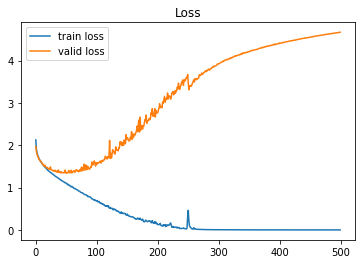

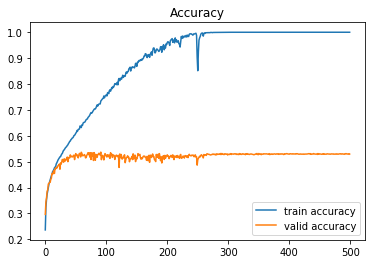

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()